# data

In [1]:
import pandas as pd
import pymongo
import numpy as np

client=pymongo.MongoClient("192.168.10.240",27017)
db= client['AI_LKJ']
collection_youtube_playlist = db['youtube_scaping_playlist']
collection_youtube_scrolling = db['youtube_scaping_scrolling']

data_youtube_playlist = collection_youtube_playlist.find()
data_youtube_scrolling = collection_youtube_scrolling.find()

df_youtube_playlist = pd.DataFrame(data_youtube_playlist)
df_youtube_scrolling = pd.DataFrame(data_youtube_scrolling)

In [2]:
df_youtube = pd.concat([df_youtube_playlist, df_youtube_scrolling], ignore_index=True)

In [3]:
df_youtube.isnull().sum()

_id          0
title        0
date         0
views        0
recommend    0
contents     0
reply        0
dtype: int64

In [4]:
# 데이터 사이즈 확인
df_youtube.shape

(34964, 7)

# 자연어처리

In [5]:
df_youtube.head()

_id                                           title  \
0  6631d19b119b5f09bb9288e4  🇰🇷 459일 만에 한국에 왔는데, 골방 신세로 보낸 2주일😷 [자가격리 vlog]   
1  6631d19b119b5f09bb9288e5  🇰🇷 459일 만에 한국에 왔는데, 골방 신세로 보낸 2주일😷 [자가격리 vlog]   
2  6631d19b119b5f09bb9288e6  🇰🇷 459일 만에 한국에 왔는데, 골방 신세로 보낸 2주일😷 [자가격리 vlog]   
3  6631d19c119b5f09bb9288e7  🇰🇷 459일 만에 한국에 왔는데, 골방 신세로 보낸 2주일😷 [자가격리 vlog]   
4  6631d19c119b5f09bb9288e8  🇰🇷 459일 만에 한국에 왔는데, 골방 신세로 보낸 2주일😷 [자가격리 vlog]   

           date           views recommend  \
0  2020. 4. 11.  조회수 2,696,715회      2.8만   
1  2020. 4. 11.  조회수 2,696,715회      2.8만   
2  2020. 4. 11.  조회수 2,696,715회      2.8만   
3  2020. 4. 11.  조회수 2,696,715회      2.8만   
4  2020. 4. 11.  조회수 2,696,715회      2.8만   

                                            contents  \
0  #자가격리브이로그 #여행가jay\n---------------------------...   
1  #자가격리브이로그 #여행가jay\n---------------------------...   
2  #자가격리브이로그 #여행가jay\n---------------------------...   
3  #자가격리브이로그 #여행가jay\n---------------------------...   
4  #자가격리브이로그 #여행가jay\n---------------------------...   

                                               reply  
0  +해당 영상에 대한 수익금의 일부를 대한민국 의료진에게 기부하였습니다.\n\n점점 ...  
1  가족이라 껴안고도싶고 하겠지만 메뉴얼대로 공항에서부터 철저하게 격리절차 밟는과정은 ...  
2  평소에 조카한테 얼마나 잘해줫으면 저렇게  삼촌을 좋아하냐 ㅎㅎ 참 좋은사람이라는게...  
3  와 눈물나... 2:20 나를 누구보다 아끼고 잘되길 바라는 우리의 부모님들.. 아...  
4  부모님이 세계여행 응원해주시고 믿어주신거 대단하시네요. 플랜카드까지 달아놓아주신거랑...

In [6]:
df_youtube_1 = df_youtube["reply"].to_list()
df_youtube_1[146]

'시골 집 좋네요 ~\n저도 나중에 저렇게 한적한 시골에 집짓고 살고 싶은....\n \n격리 엄청 잘하셨네요\n지금 제 남동생은 지병이 발병해서 코로나도 엄청 조심하는 중인데\n\n건강한 여행가 님 보니 부럽고 눈물 나네요'

In [7]:
# 숫자 삭제
df_youtube['reply_preprocess'] = df_youtube['reply'].str.replace('[0-9]','',regex=True)

## mecab

In [8]:
!pip install python-mecab-ko

In [9]:
from mecab import MeCab
mecab = MeCab()

In [10]:
mecab.pos(df_youtube['reply'][100])

[('저', 'NP'),
 ('도', 'JX'),
 ('신랑', 'NNG'),
 ('외국', 'NNG'),
 ('에', 'JKB'),
 ('놓', 'VV'),
 ('고', 'EC'),
 ('혼자', 'NNG'),
 ('어제', 'MAG'),
 ('들어왔', 'VV+EP'),
 ('는데', 'EF'),
 ('.', 'SF'),
 ('.....', 'SY'),
 ('현수막', 'NNG'),
 ('보', 'VV'),
 ('고', 'EC'),
 ('눈물', 'NNG'),
 ('핑', 'MAG'),
 ('돌', 'VV'),
 ('았', 'EP'),
 ('어요', 'EF'),
 ('ㅜㅜ', 'UNKNOWN'),
 ('저희', 'NP'),
 ('집', 'NNG'),
 ('에', 'JKB'),
 ('도', 'JX'),
 ('친정', 'NNG'),
 ('엄마', 'NNG'),
 ('가', 'JKS'),
 ('이것저것', 'NNG'),
 ('사', 'VV'),
 ('다', 'EC'),
 ('놓', 'VX'),
 ('으시', 'EP'),
 ('고', 'EC'),
 ('청소', 'NNG'),
 ('해', 'XSV+EC'),
 ('놓', 'VX'),
 ('느', 'VV'),
 ('시', 'EP'),
 ('고', 'EC'),
 ('냉장고', 'NNG'),
 ('에', 'JKB'),
 ('반찬', 'NNG'),
 ('까지', 'JX'),
 ('다', 'MAG'),
 ('채워', 'VV+EC'),
 ('놓', 'VX'),
 ('으신', 'EP+ETM'),
 ('거', 'NNB'),
 ('보고', 'JKB'),
 ('펑펑', 'MAG'),
 ('울', 'VV'),
 ('었', 'EP'),
 ('거든요', 'EF'),
 ('.', 'SF'),
 ('..', 'SY'),
 ('정말', 'MAG'),
 ('부모', 'NNG'),
 ('님', 'XSN'),
 ('사랑', 'NNG'),
 ('은', 'JX'),
 ('대단', 'XR'),
 ('한', 'XSA+ETM'),
 ('것', 'NNB'),


In [11]:
def mecab_tag(text):
    morphs_nouns = []
    morphs_nouns_list = []
    for sentence in text:
        # 명사, 형용사, 동사
        # morphs = [morph for morph, tag in mecab.pos(sentence) if tag in ['VV+ETN', 'MM', 'NNG', 'NNP', 'NP', 'NR', 'VA', 'VV', 'EF','VA+ETM']]
        morphs = [morph for morph, tag in mecab.pos(sentence) if tag in ['VV+ETN', 'MM', 'NNG', 'NNP', 'NP', 'NR', 'VA', 'VV']]
        morphs_nouns.append(' '.join(morphs))
    
    return morphs_nouns

In [12]:
df_youtube.isnull().sum()

_id                 0
title               0
date                0
views               0
recommend           0
contents            0
reply               0
reply_preprocess    0
dtype: int64

In [13]:
morphs_nouns = mecab_tag(df_youtube['reply'])

In [14]:
df_youtube['reply_clean_mecab'] = morphs_nouns

In [15]:
df_youtube[100:110]

_id                                           title  \
100  6631d1a2119b5f09bb928948  🇰🇷 459일 만에 한국에 왔는데, 골방 신세로 보낸 2주일😷 [자가격리 vlog]   
101  6631d1a2119b5f09bb928949  🇰🇷 459일 만에 한국에 왔는데, 골방 신세로 보낸 2주일😷 [자가격리 vlog]   
102  6631d1a2119b5f09bb92894a  🇰🇷 459일 만에 한국에 왔는데, 골방 신세로 보낸 2주일😷 [자가격리 vlog]   
103  6631d1a2119b5f09bb92894b  🇰🇷 459일 만에 한국에 왔는데, 골방 신세로 보낸 2주일😷 [자가격리 vlog]   
104  6631d1a2119b5f09bb92894c  🇰🇷 459일 만에 한국에 왔는데, 골방 신세로 보낸 2주일😷 [자가격리 vlog]   
105  6631d1a2119b5f09bb92894d  🇰🇷 459일 만에 한국에 왔는데, 골방 신세로 보낸 2주일😷 [자가격리 vlog]   
106  6631d1a2119b5f09bb92894e  🇰🇷 459일 만에 한국에 왔는데, 골방 신세로 보낸 2주일😷 [자가격리 vlog]   
107  6631d1a2119b5f09bb92894f  🇰🇷 459일 만에 한국에 왔는데, 골방 신세로 보낸 2주일😷 [자가격리 vlog]   
108  6631d1a2119b5f09bb928950  🇰🇷 459일 만에 한국에 왔는데, 골방 신세로 보낸 2주일😷 [자가격리 vlog]   
109  6631d1a2119b5f09bb928951  🇰🇷 459일 만에 한국에 왔는데, 골방 신세로 보낸 2주일😷 [자가격리 vlog]   

             date           views recommend  \
100  2020. 4. 11.  조회수 2,696,715회      2.8만   
101  2020. 4. 11.  조회수 2,696,715회      2.8만   
102  2020. 4. 11.  조회수 2,696,715회      2.8만   
103  2020. 4. 11.  조회수 2,696,715회      2.8만   
104  2020. 4. 11.  조회수 2,696,715회      2.8만   
105  2020. 4. 11.  조회수 2,696,715회      2.8만   
106  2020. 4. 11.  조회수 2,696,715회      2.8만   
107  2020. 4. 11.  조회수 2,696,715회      2.8만   
108  2020. 4. 11.  조회수 2,696,715회      2.8만   
109  2020. 4. 11.  조회수 2,696,715회      2.8만   

                                              contents  \
100  #자가격리브이로그 #여행가jay\n---------------------------...   
101  #자가격리브이로그 #여행가jay\n---------------------------...   
102  #자가격리브이로그 #여행가jay\n---------------------------...   
103  #자가격리브이로그 #여행가jay\n---------------------------...   
104  #자가격리브이로그 #여행가jay\n---------------------------...   
105  #자가격리브이로그 #여행가jay\n---------------------------...   
106  #자가격리브이로그 #여행가jay\n---------------------------...   
107  #자가격리브이로그 #여행가jay\n---------------------------...   
108  #자가격리브이로그 #여행가jay\n---------------------------...   
109  #자가격리브이로그 #여행가jay\n---------------------------...   

                                                 reply  \
100  저도 신랑 외국에 놓고 혼자 어제 들어왔는데...... 현수막 보고 눈물핑 돌았어요...   
101  우앟..뉴스에서만 보던 일이 유튜브로 직접 보여주니 정말 자가격리 잘 하셨고 너무 ...   
102         배려있고  상냥한 가족들~ \n그 속에서  자란 제이님  예쁜 청년이에요 ~   
103  집 되게 좋네요  그나저나 플랜카드 감동.. 저렇게 해주는 가족분들 ..안봐도 얼마...   
104                                  정규방송서 틀어줘라 이 모범영상   
105  가족의 정이 느껴지네요~부모님이 바르게키우신것같아요~\n마지막에 노래까지들려주시고~...   
106  13:29 이런거 너무 좋네요ㅋㅋ제이님이 좋은 사람이라서 주변사람들에게 환영 받는것...   
107  격리시설에서 격리 중이시거나 집에서 자가 격리하시는 분들 모두 답답하실 텐데 다들 ...   
108  모범적인 자가격리 모습! 멋지십니다~ 고생 많으셨어요! 가족들의 플랜카드와 누나의 ...   
109  와~집 너무 좋네요.자가격리하기 최적화된곳?? ㅎㅎ  덕분에 생생한 체험을 했네요^...   

                                      reply_preprocess  \
100  저도 신랑 외국에 놓고 혼자 어제 들어왔는데...... 현수막 보고 눈물핑 돌았어요...   
101  우앟..뉴스에서만 보던 일이 유튜브로 직접 보여주니 정말 자가격리 잘 하셨고 너무 ...   
102         배려있고  상냥한 가족들~ \n그 속에서  자란 제이님  예쁜 청년이에요 ~   
103  집 되게 좋네요  그나저나 플랜카드 감동.. 저렇게 해주는 가족분들 ..안봐도 얼마...   
104                                  정규방송서 틀어줘라 이 모범영상   
105  가족의 정이 느껴지네요~부모님이 바르게키우신것같아요~\n마지막에 노래까지들려주시고~...   
106     : 이런거 너무 좋네요ㅋㅋ제이님이 좋은 사람이라서 주변사람들에게 환영 받는것 같아요   
107  격리시설에서 격리 중이시거나 집에서 자가 격리하시는 분들 모두 답답하실 텐데 다들 ...   
108  모범적인 자가격리 모습! 멋지십니다~ 고생 많으셨어요! 가족들의 플랜카드와 누나의 ...   
109  와~집 너무 좋네요.자가격리하기 최적화된곳?? ㅎㅎ  덕분에 생생한 체험을 했네요^...   

                                     reply_clean_mecab  
100  저 신랑 외국 놓 혼자 현수막 보 눈물 돌 저희 집 친정 엄마 이것저것 사 청소 느...  
101                   우 뉴스 보 일 유튜브 자 격리 하 하 말 밖 힘들 화이팅  
102                                  배려 있 가족 그 속 제이 청년  
103             집 좋 플랜 카드 감동 저렇 가족 화목 가정 보이 저런 분위기 보 좋  
104                                    정규 방송 틀 이 모범 영상  
105         가족 정 부모 바르 키우 같 마지막 노래 감사 앞 기대 같 제이 응원 화이팅  
106                          이런 좋 제이 좋 사람 주변 사람 환영 받 같  
107               격리 시설 격리 집 자 격리 힘내 모두 방역 지침 코로나 좋 힘내  
108  모범 격리 모습 멋지 고생 많 가족 플랜 카드 누나 케익 사랑 가족 조카 마지막 기...  
109  집 좋 자 격리 최적 덕분 체험 준비 가족 시차 응 셀프 이발 기타 치 노래 제이 ...

In [16]:
df_youtube.query('reply_clean_mecab == ""')

_id  \
163    6631d1a5119b5f09bb928987   
279    6631d1be119b5f09bb9289fb   
322    6631d1c0119b5f09bb928a26   
344    6631d1c2119b5f09bb928a3c   
359    6631d1c2119b5f09bb928a4b   
...                         ...   
34851  6631cbc77547545ba205e7c0   
34864  6631cbc77547545ba205e7cd   
34876  6631cbc87547545ba205e7d9   
34877  6631cbc87547545ba205e7da   
34889  6631cbfb7547545ba205e7e6   

                                                title           date  \
163    🇰🇷 459일 만에 한국에 왔는데, 골방 신세로 보낸 2주일😷 [자가격리 vlog]   2020. 4. 11.   
279    🇰🇷 한적한 섬마을에서 생활해보기 (with 쏘이, 곽튜브, 이나랜드) in 거제도   2020. 6. 26.   
322    🇰🇷 한적한 섬마을에서 생활해보기 (with 쏘이, 곽튜브, 이나랜드) in 거제도   2020. 6. 26.   
344    🇰🇷 한적한 섬마을에서 생활해보기 (with 쏘이, 곽튜브, 이나랜드) in 거제도   2020. 6. 26.   
359    🇰🇷 한적한 섬마을에서 생활해보기 (with 쏘이, 곽튜브, 이나랜드) in 거제도   2020. 6. 26.   
...                                               ...            ...   
34851             국내여행지 추천 진천 가볼만한곳 아름다운 진천 이팝나무 길 명소    2021. 5. 8.   
34864             국내여행지 추천 진천 가볼만한곳 아름다운 진천 이팝나무 길 명소    2021. 5. 8.   
34876             국내여행지 추천 진천 가볼만한곳 아름다운 진천 이팝나무 길 명소    2021. 5. 8.   
34877             국내여행지 추천 진천 가볼만한곳 아름다운 진천 이팝나무 길 명소    2021. 5. 8.   
34889               국내 여행지 추천 영덕 가볼만한 곳 영덕에 이런곳이 있다고?  2020. 11. 18.   

                views recommend  \
163    조회수 2,696,715회      2.8만   
279      조회수 149,739회      2.2천   
322      조회수 149,739회      2.2천   
344      조회수 149,739회      2.2천   
359      조회수 149,739회      2.2천   
...               ...       ...   
34851     조회수 22,716회       375   
34864     조회수 22,716회       375   
34876     조회수 22,716회       375   
34877     조회수 22,716회       375   
34889     조회수 20,399회       183   

                                                contents  \
163    #자가격리브이로그 #여행가jay\n---------------------------...   
279    #곽튜브 #쏘이 #이나랜드 #여행가jay #여행유튜버 #거제도 \n---------...   
322    #곽튜브 #쏘이 #이나랜드 #여행가jay #여행유튜버 #거제도 \n---------...   
344    #곽튜브 #쏘이 #이나랜드 #여행가jay #여행유튜버 #거제도 \n---------...   
359    #곽튜브 #쏘이 #이나랜드 #여행가jay #여행유튜버 #거제도 \n---------...   
...                                                  ...   
34851  국내여행지 추천 진천 가볼만한곳 아름다운 진천 이팝나무 길 명소 \n\n이번에 떠난...   
34864  국내여행지 추천 진천 가볼만한곳 아름다운 진천 이팝나무 길 명소 \n\n이번에 떠난...   
34876  국내여행지 추천 진천 가볼만한곳 아름다운 진천 이팝나무 길 명소 \n\n이번에 떠난...   
34877  국내여행지 추천 진천 가볼만한곳 아름다운 진천 이팝나무 길 명소 \n\n이번에 떠난...   
34889  국내 여행지 추천 영덕 가볼만한 곳 영덕에 이런곳이 있다고? \n\n대게의 계절이 ...   

                                                   reply  \
163    Awww Jay, i am only catching up with your trav...   
279                                                        
322                                                        
344                                          햐 난 왜 안데려갔지   
359                                                04:02   
...                                                  ...   
34851  .Hello  This video deserve more views.Thanks f...   
34864                                                      
34876                                                ㅇ_ㅇ   
34877                                          ซารางเฮโย   
34889                                    꼭 한번 가보아야 겠ㅇ ㅓ요   

                                        reply_preprocess reply_clean_mecab  
163    Awww Jay, i am only catching up with your trav...                    
279                                                                         
322                                                                         
344                                          햐 난 왜 안데려갔지                    
359                                                    :                    
...                                                  ...               ...  
34851  .Hello  This video deserve more views.Thanks f...                    
34864                                                                       
34876                                                ㅇ_ㅇ                    
34877                                          ซารางเฮโย                    
34889                           

## okt

In [17]:
!pip install konlpy

In [18]:
from konlpy.tag import Okt
okt = Okt()

In [19]:
# 조사, 어미, 구두점 같은 것을 제거
stopwords = ["하다","쏘다","보다","좋다","가다","넘다","이다","먹다","쏘이다","있다","같다","보다","되다","오다","멋지다","자다","가보다"
             ,"싶다","찌다","제이","들다","많다","없다","알다","따다","아니다","어떻다","하나요","해주다","메이","저리다","보고","만들다"
             ,"다시","찍다","기다리다","돌아오다","살다","다녀오다","멀다","드리다","보기","아니다","메이","여기","오늘","역시","우와"
             ,"어디","나오다","나다","진짜","하겄","습보","나은","상전이","태우다","궁내","언제","받다","보이다","한번","헐다","이면"
             ,"갈라지다","외치다","추워지다","갈다","보내다"]
def okt_clean(text):
    clean_text = []
    for word in okt.pos(text, stem=True):
        if word[1] not in ['Josa', 'Eomi', 'Punctuation', 'Adverb', 'Suffix', 'KoreanParticle', 'Alpha'] and word[0] not in stopwords:
            clean_text.append(word[0])

    return " ".join(clean_text)

In [20]:
df_youtube['reply_clean_okt'] = df_youtube['reply_preprocess'].apply(okt_clean)

In [21]:
df_youtube['reply_clean_okt'][101:150]

101      우앟 뉴스 일이 유튜브 직접 보여주다 정말 자가 격리 잘 말 \n 주간 힘들다 화이팅
102                            배다 상냥하다 가족 그 속 자라다 예쁘다 청년
103               집 플랜카드 감동 가족 안 얼마나 화목 가정 저런 분위기 부르다 따름
104                                   정규 방송 틀어주다 이 모범 영상
105    가족 정이 느껴지다 부모님 바르게 키우다 \n 마지막 노래 들려주다 \n 감사하다 ...
106                                      이렇다 사람 주변 사람 환영
107    격리 시설 격리 중이 시 거나 집 자가 격리 모두 답답하다 힘내다 모두 방역 지침 ...
108    모범 자가 격리 모습 고생 가족 플랜카드 누나 케익 정말 사랑 가득하다 가족 요 조...
109    집 자가 격리 최적화 곳 덕분 생생하다 체험 꼼꼼하다 준비 가족 시차 적응하다 셀프...
110                                   이건 예 천 기지 이륙 엔진 사용
111                              미치다 지구 뿌셔 온도 판 어후 무슨 감정
112                           자가 격리 모범 사례 \n  님 가족 모두 고생
113                       이 진정하다 자가 격리 가족 정말 느껴지다 조카 귀엽다
114                   영상 중 최애 영상 \n 소소하다 지루하다 않다 따뜻하다 영상
115                                     따뜻하다 가족 모습 미소 절로
116                                 가족 대대손손 스윗 심지어 조카 스윗
117    머슴밥 요 친구 옥상 대화 넘웃겨옄 커트 기타연주 커트 라이브 키시 려고 늦다 뭔가...
118                            

In [22]:
okt.pos(df_youtube['reply_clean_okt'][1])

[('가족', 'Noun'),
 ('끼', 'Noun'),
 ('다', 'Josa'),
 ('메뉴얼', 'Noun'),
 ('공항', 'Noun'),
 ('철저하다', 'Adjective'),
 ('격리', 'Noun'),
 ('절차', 'Noun'),
 ('밟다', 'Verb'),
 ('과정', 'Noun'),
 ('정말', 'Noun'),
 ('이', 'Noun'),
 ('시국', 'Noun'),
 ('본받다', 'Verb'),
 ('모습', 'Noun'),
 ('부모님', 'Noun'),
 ('존경', 'Noun'),
 ('스럽다', 'Adjective')]

In [23]:
# 문장 정리 및 재정제
def solve_text(text):
    change_dict = {
        '의료 진': '의료진'
        , '세계 여행' : '세계여행'
        , '자가 격리' : '자가격리'
        , '선 별 진료 소' : '선별진료소'
        , '간호 직' : '간호직'
        , '격리 기간' : '격리기간'
        , '장기 여행' : '장기여행'
        , '유투 버' : '유투버'
        , '브이 로그' : '브이로그'
        , '공익 광고' : '공익광고'
    }
    for i in change_dict:
        text = text.replace(i,change_dict[i])
    return text

In [24]:
df_youtube['reply_clean_okt'] = df_youtube['reply_clean_okt'].apply(solve_text)

In [25]:
df_youtube

_id  \
0      6631d19b119b5f09bb9288e4   
1      6631d19b119b5f09bb9288e5   
2      6631d19b119b5f09bb9288e6   
3      6631d19c119b5f09bb9288e7   
4      6631d19c119b5f09bb9288e8   
...                         ...   
34959  6631cc977547545ba205e82c   
34960  6631cc977547545ba205e82d   
34961  6631cc977547545ba205e82e   
34962  6631cc977547545ba205e82f   
34963  6631cc977547545ba205e830   

                                                title          date  \
0      🇰🇷 459일 만에 한국에 왔는데, 골방 신세로 보낸 2주일😷 [자가격리 vlog]  2020. 4. 11.   
1      🇰🇷 459일 만에 한국에 왔는데, 골방 신세로 보낸 2주일😷 [자가격리 vlog]  2020. 4. 11.   
2      🇰🇷 459일 만에 한국에 왔는데, 골방 신세로 보낸 2주일😷 [자가격리 vlog]  2020. 4. 11.   
3      🇰🇷 459일 만에 한국에 왔는데, 골방 신세로 보낸 2주일😷 [자가격리 vlog]  2020. 4. 11.   
4      🇰🇷 459일 만에 한국에 왔는데, 골방 신세로 보낸 2주일😷 [자가격리 vlog]  2020. 4. 11.   
...                                               ...           ...   
34959  국내여행지 가을 영월 가볼만한곳 BEST 4 붉은 메밀 꽃이 피었습니다 강원도 여행  2021. 10. 9.   
34960  국내여행지 가을 영월 가볼만한곳 BEST 4 붉은 메밀 꽃이 피었습니다 강원도 여행  2021. 10. 9.   
34961  국내여행지 가을 영월 가볼만한곳 BEST 4 붉은 메밀 꽃이 피었습니다 강원도 여행  2021. 10. 9.   
34962  국내여행지 가을 영월 가볼만한곳 BEST 4 붉은 메밀 꽃이 피었습니다 강원도 여행  2021. 10. 9.   
34963  국내여행지 가을 영월 가볼만한곳 BEST 4 붉은 메밀 꽃이 피었습니다 강원도 여행  2021. 10. 9.   

                views recommend  \
0      조회수 2,696,715회      2.8만   
1      조회수 2,696,715회      2.8만   
2      조회수 2,696,715회      2.8만   
3      조회수 2,696,715회      2.8만   
4      조회수 2,696,715회      2.8만   
...               ...       ...   
34959     조회수 18,336회       285   
34960     조회수 18,336회       285   
34961     조회수 18,336회       285   
34962     조회수 18,336회       285   
34963     조회수 18,336회       285   

                                                contents  \
0      #자가격리브이로그 #여행가jay\n---------------------------...   
1      #자가격리브이로그 #여행가jay\n---------------------------...   
2      #자가격리브이로그 #여행가jay\n---------------------------...   
3      #자가격리브이로그 #여행가jay\n---------------------------...   
4      #자가격리브이로그 #여행가jay\n---------------------------...   
...                                                  ...   
34959  국내여행지 가을 영월 가볼만한곳 BEST 4 붉은 메밀 꽃이 피었습니다  강원도 여...   
34960  국내여행지 가을 영월 가볼만한곳 BEST 4 붉은 메밀 꽃이 피었습니다  강원도 여...   
34961  국내여행지 가을 영월 가볼만한곳 BEST 4 붉은 메밀 꽃이 피었습니다  강원도 여...   
34962  국내여행지 가을 영월 가볼만한곳 BEST 4 붉은 메밀 꽃이 피었습니다  강원도 여...   
34963  국내여행지 가을 영월 가볼만한곳 BEST 4 붉은 메밀 꽃이 피었습니다  강원도 여...   

                                                   reply  \
0      +해당 영상에 대한 수익금의 일부를 대한민국 의료진에게 기부하였습니다.\n\n점점 ...   
1      가족이라 껴안고도싶고 하겠지만 메뉴얼대로 공항에서부터 철저하게 격리절차 밟는과정은 ...   
2      평소에 조카한테 얼마나 잘해줫으면 저렇게  삼촌을 좋아하냐 ㅎㅎ 참 좋은사람이라는게...   
3      와 눈물나... 2:20 나를 누구보다 아끼고 잘되길 바라는 우리의 부모님들.. 아...   
4      부모님이 세계여행 응원해주시고 믿어주신거 대단하시네요. 플랜카드까지 달아놓아주신거랑...   
...                                                  ...   
34959  붉은 메일이 있다는건 첨 알았네요. 해외 여행하시는 분들 국내는 다 가보고 해외여행...   
34960  영월에 선돌.한반도지형은\n가봤는데 붉은메밀꽃밭\n가보려는데 카카오네비에\n주소 쳐...   
34961      영월 ...강추 여행지!!!!!!\n감히 한마디 하자면 ㅋㅋㅋㅋ \n청령포 추가요   
34962                    붉은 메밀은 어디가야 볼 수 있을까요? 주소가 궁금합니다   
34963                                      메일로 연락이 어렵습니다   

                                        reply_preprocess  \
0      +해당 영상에 대한 수익금의 일부를 대한민국 의료진에게 기부하였습니다.\n\n점점 ...   
1      가족이라 껴안고도싶고 하겠지만 메뉴얼대로 공항에서부터 철저하게 격리절차 밟는과정은 ...   
2      평소에 조카한테 얼마나 잘해줫으면 저렇게  삼촌을 좋아하냐 ㅎㅎ 참 좋은사람이라는게...   
3      와 눈물나... : 나를 누구보다 아끼고 잘되길 바라는 우리의 부모님들.. 아들 돌...   
4      부모님이 세계여행 응원해주시고 믿어주신거 대단하시네요. 플랜카드까지 달아놓아주신거랑...   
...                                                  ...   
34959  붉은 메일이 있다는건 첨 알았네요. 해외 여행하시는 분들 국내는 다 가보고 해외여행...   
34960  영월에 선돌.한반도지형은\n가봤는데 붉은메밀꽃밭\n가보려는데 카카오네비에\n주소 쳐...   
34961      영월 ...강추 여행지!!!!!!\n감히 한마디 하자면 ㅋㅋㅋㅋ \n청령포 추가요   
34962                    붉은 메밀은 어디가야 볼 수 있을까요? 주소가 궁금합니다   
34963                                      메일로 연락이 어렵습니다   

                                       reply_clean_mecab  \
0      해당 영상 수익금 일부 민국 의료진 기부 나아지 상황 이 사태 조심 같 모두 격리 ...   
1             가족 껴안 메뉴 공항 철저 격리 절차 밟 과정 이 시국 본받 모습

In [26]:
df_youtube.query('reply_clean_okt == ""')

_id  \
163    6631d1a5119b5f09bb928987   
279    6631d1be119b5f09bb9289fb   
322    6631d1c0119b5f09bb928a26   
359    6631d1c2119b5f09bb928a4b   
437    6631d1da119b5f09bb928a99   
...                         ...   
34742  6631ca917547545ba205e753   
34800  6631cb2b7547545ba205e78d   
34851  6631cbc77547545ba205e7c0   
34864  6631cbc77547545ba205e7cd   
34876  6631cbc87547545ba205e7d9   

                                                title          date  \
163    🇰🇷 459일 만에 한국에 왔는데, 골방 신세로 보낸 2주일😷 [자가격리 vlog]  2020. 4. 11.   
279    🇰🇷 한적한 섬마을에서 생활해보기 (with 쏘이, 곽튜브, 이나랜드) in 거제도  2020. 6. 26.   
322    🇰🇷 한적한 섬마을에서 생활해보기 (with 쏘이, 곽튜브, 이나랜드) in 거제도  2020. 6. 26.   
359    🇰🇷 한적한 섬마을에서 생활해보기 (with 쏘이, 곽튜브, 이나랜드) in 거제도  2020. 6. 26.   
437              🇰🇷10만 기념, 무계획으로 대책 없이 떠난 10일간의 제주 일기  2020. 10. 8.   
...                                               ...           ...   
34742                그동안 공개 못한 국내 여행 맛집 11곳   2020. 6. 2.   
34800         국내여행지 추천 순창 가볼만한 곳 하늘길과 함께 갈 만한 추천 순창여행   2021. 8. 3.   
34851             국내여행지 추천 진천 가볼만한곳 아름다운 진천 이팝나무 길 명소   2021. 5. 8.   
34864             국내여행지 추천 진천 가볼만한곳 아름다운 진천 이팝나무 길 명소   2021. 5. 8.   
34876             국내여행지 추천 진천 가볼만한곳 아름다운 진천 이팝나무 길 명소   2021. 5. 8.   

                views recommend  \
163    조회수 2,696,715회      2.8만   
279      조회수 149,739회      2.2천   
322      조회수 149,739회      2.2천   
359      조회수 149,739회      2.2천   
437      조회수 189,800회      3.9천   
...               ...       ...   
34742     조회수 25,873회       183   
34800     조회수 23,510회       268   
34851     조회수 22,716회       375   
34864     조회수 22,716회       375   
34876     조회수 22,716회       375   

                                                contents  \
163    #자가격리브이로그 #여행가jay\n---------------------------...   
279    #곽튜브 #쏘이 #이나랜드 #여행가jay #여행유튜버 #거제도 \n---------...   
322    #곽튜브 #쏘이 #이나랜드 #여행가jay #여행유튜버 #거제도 \n---------...   
359    #곽튜브 #쏘이 #이나랜드 #여행가jay #여행유튜버 #거제도 \n---------...   
437    #제주브이로그 #여행가 제이\n\n올해 안에 10만을 달성하는 게 목표였는데\n생각...   
...                                                  ...   
34742  그동안 공개 못한 국내여행 맛집 11곳 \n\n\n허겁지겁 먹느라...   
34800  국내여행지 추천 순창 가볼만한 곳 하늘길과 함께 갈 만한 추천 순창여행\n\n휴가시...   
34851  국내여행지 추천 진천 가볼만한곳 아름다운 진천 이팝나무 길 명소 \n\n이번에 떠난...   
34864  국내여행지 추천 진천 가볼만한곳 아름다운 진천 이팝나무 길 명소 \n\n이번에 떠난...   
34876  국내여행지 추천 진천 가볼만한곳 아름다운 진천 이팝나무 길 명소 \n\n이번에 떠난...   

                                                   reply  \
163    Awww Jay, i am only catching up with your trav...   
279                                                        
322                                                        
359                                                04:02   
437                                       기다렸어요 !!!ㅠㅠㅠㅠㅠ   
...                                                  ...   
34742                                                좋아요   
34800                                              wowww   
34851  .Hello  This video deserve more views.Thanks f...   
34864                                                      
34876                                                ㅇ_ㅇ   

                                        reply_preprocess reply_clean_mecab  \
163    Awww Jay, i am only catching up with your trav...                     
279                                                                          
322                                                                          
359                                                    :                     
437                                       기다렸어요 !!!ㅠㅠㅠㅠㅠ                     
...                                                  ...               ...   
34742                                                좋아요                 좋   
34800                                              wowww                     
34851  .Hello  This video deserve more views.Thanks f...                     
34864                                                                        
34876                            

# topic 분류

### 전처리

In [27]:
df_youtube.isin(['']).sum()

_id                     0
title                   0
date                    0
views                   0
recommend               0
contents              178
reply                 332
reply_preprocess      351
reply_clean_mecab    1162
reply_clean_okt      1067
dtype: int64

In [28]:
df_youtube_okt = df_youtube.copy()

In [29]:
df_youtube_okt.replace({'': np.nan}, inplace=True)

In [30]:
df_youtube_okt.dropna(subset=['reply_clean_okt'], inplace=True)

In [31]:
df_youtube_okt.isin(['']).sum()

_id                  0
title                0
date                 0
views                0
recommend            0
contents             0
reply                0
reply_preprocess     0
reply_clean_mecab    0
reply_clean_okt      0
dtype: int64

In [32]:
df_youtube_okt.reset_index()[180:200]

index                       _id  \
180    181  6631d1a9119b5f09bb928999   
181    182  6631d1a9119b5f09bb92899a   
182    183  6631d1a9119b5f09bb92899b   
183    184  6631d1aa119b5f09bb92899c   
184    185  6631d1aa119b5f09bb92899d   
185    186  6631d1aa119b5f09bb92899e   
186    187  6631d1aa119b5f09bb92899f   
187    188  6631d1aa119b5f09bb9289a0   
188    189  6631d1aa119b5f09bb9289a1   
189    190  6631d1aa119b5f09bb9289a2   
190    191  6631d1aa119b5f09bb9289a3   
191    192  6631d1aa119b5f09bb9289a4   
192    193  6631d1aa119b5f09bb9289a5   
193    194  6631d1aa119b5f09bb9289a6   
194    195  6631d1aa119b5f09bb9289a7   
195    196  6631d1aa119b5f09bb9289a8   
196    197  6631d1aa119b5f09bb9289a9   
197    198  6631d1aa119b5f09bb9289aa   
198    199  6631d1aa119b5f09bb9289ab   
199    200  6631d1ba119b5f09bb9289ac   

                                              title          date  \
180  🇰🇷 459일 만에 한국에 왔는데, 골방 신세로 보낸 2주일😷 [자가격리 vlog]  2020. 4. 11.   
181  🇰🇷 459일 만에 한국에 왔는데, 골방 신세로 보낸 2주일😷 [자가격리 vlog]  2020. 4. 11.   
182  🇰🇷 459일 만에 한국에 왔는데, 골방 신세로 보낸 2주일😷 [자가격리 vlog]  2020. 4. 11.   
183  🇰🇷 459일 만에 한국에 왔는데, 골방 신세로 보낸 2주일😷 [자가격리 vlog]  2020. 4. 11.   
184  🇰🇷 459일 만에 한국에 왔는데, 골방 신세로 보낸 2주일😷 [자가격리 vlog]  2020. 4. 11.   
185  🇰🇷 459일 만에 한국에 왔는데, 골방 신세로 보낸 2주일😷 [자가격리 vlog]  2020. 4. 11.   
186  🇰🇷 459일 만에 한국에 왔는데, 골방 신세로 보낸 2주일😷 [자가격리 vlog]  2020. 4. 11.   
187  🇰🇷 459일 만에 한국에 왔는데, 골방 신세로 보낸 2주일😷 [자가격리 vlog]  2020. 4. 11.   
188  🇰🇷 459일 만에 한국에 왔는데, 골방 신세로 보낸 2주일😷 [자가격리 vlog]  2020. 4. 11.   
189  🇰🇷 459일 만에 한국에 왔는데, 골방 신세로 보낸 2주일😷 [자가격리 vlog]  2020. 4. 11.   
190  🇰🇷 459일 만에 한국에 왔는데, 골방 신세로 보낸 2주일😷 [자가격리 vlog]  2020. 4. 11.   
191  🇰🇷 459일 만에 한국에 왔는데, 골방 신세로 보낸 2주일😷 [자가격리 vlog]  2020. 4. 11.   
192  🇰🇷 459일 만에 한국에 왔는데, 골방 신세로 보낸 2주일😷 [자가격리 vlog]  2020. 4. 11.   
193  🇰🇷 459일 만에 한국에 왔는데, 골방 신세로 보낸 2주일😷 [자가격리 vlog]  2020. 4. 11.   
194  🇰🇷 459일 만에 한국에 왔는데, 골방 신세로 보낸 2주일😷 [자가격리 vlog]  2020. 4. 11.   
195  🇰🇷 459일 만에 한국에 왔는데, 골방 신세로 보낸 2주일😷 [자가격리 vlog]  2020. 4. 11.   
196  🇰🇷 459일 만에 한국에 왔는데, 골방 신세로 보낸 2주일😷 [자가격리 vlog]  2020. 4. 11.   
197  🇰🇷 459일 만에 한국에 왔는데, 골방 신세로 보낸 2주일😷 [자가격리 vlog]  2020. 4. 11.   
198  🇰🇷 459일 만에 한국에 왔는데, 골방 신세로 보낸 2주일😷 [자가격리 vlog]  2020. 4. 11.   
199  🇰🇷 한적한 섬마을에서 생활해보기 (with 쏘이, 곽튜브, 이나랜드) in 거제도  2020. 6. 26.   

              views recommend  \
180  조회수 2,696,715회      2.8만   
181  조회수 2,696,715회      2.8만   
182  조회수 2,696,715회      2.8만   
183  조회수 2,696,715회      2.8만   
184  조회수 2,696,715회      2.8만   
185  조회수 2,696,715회      2.8만   
186  조회수 2,696,715회      2.8만   
187  조회수 2,696,715회      2.8만   
188  조회수 2,696,715회      2.8만   
189  조회수 2,696,715회      2.8만   
190  조회수 2,696,715회      2.8만   
191  조회수 2,696,715회      2.8만   
192  조회수 2,696,715회      2.8만   
193  조회수 2,696,715회      2.8만   
194  조회수 2,696,715회      2.8만   
195  조회수 2,696,715회      2.8만   
196  조회수 2,696,715회      2.8만   
197  조회수 2,696,715회      2.8만   
198  조회수 2,696,715회      2.8만   
199    조회수 149,739회      2.2천   

                                              contents  \
180  #자가격리브이로그 #여행가jay\n---------------------------...   
181  #자가격리브이로그 #여행가jay\n---------------------------...   
182  #자가격리브이로그 #여행가jay\n---------------------------...   
183  #자가격리브이로그 #여행가jay\n---------------------------...   
184  #자가격리브이로그 #여행가jay\n---------------------------...   
185  #자가격리브이로그 #여행가jay\n---------------------------...   
186  #자가격리브이로그 #여행가jay\n---------------------------...   
187  #자가격리브이로그 #여행가jay\n---------------------------...   
188  #자가격리브이로그 #여행가jay\n---------------------------...   
189  #자가격리브이로그 #여행가jay\n---------------------------...   
190  #자가격리브이로그 #여행가jay\n---------------------------...   
191  #자가격리브이로그 #여행가jay\n---------------------------...   
192  #자가격리브이로그 #여행가jay\n---------------------------...   
193  #자가격리브이로그 #여행가jay\n---------------------------...   
194  #자가격리브이로그 #여행가jay\n---------------------------...   
195  #자가격리브이로그 #여행가jay\n---------------------------...   
196  #자가격리브이로그 #여행가jay\n----------

### 분석

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [34]:
# df_youtube_okt['recommend'].unique()

#### 추천수 0 - 1000

In [35]:
# 추천수가 1000 이하인 데이터만 필터링
filtered_data = df_youtube_okt[df_youtube_okt['recommend'] <= '1000']

# 텍스트 데이터 전처리 및 벡터화
vectorizer = TfidfVectorizer()
feature_1000 = vectorizer.fit_transform(filtered_data['reply_clean_okt'])

In [36]:
# LDA 모델 훈련
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(feature_1000)

LatentDirichletAllocation(n_components=5, random_state=42)

In [37]:
# 훈련된 LDA 모델로 문서별 토픽 할당
document_topics = lda.transform(feature_1000)

# 각 문서의 주요 토픽 확인
for idx, topic in enumerate(document_topics):
    print(f"Document {idx} belongs to Topic {topic.argmax()}")

Document 0 belongs to Topic 0
Document 1 belongs to Topic 2
Document 2 belongs to Topic 4
Document 3 belongs to Topic 4
Document 4 belongs to Topic 4
Document 5 belongs to Topic 4
Document 6 belongs to Topic 1
Document 7 belongs to Topic 4
Document 8 belongs to Topic 2
Document 9 belongs to Topic 2
Document 10 belongs to Topic 4
Document 11 belongs to Topic 2
Document 12 belongs to Topic 4
Document 13 belongs to Topic 1
Document 14 belongs to Topic 4
Document 15 belongs to Topic 3
Document 16 belongs to Topic 4
Document 17 belongs to Topic 0
Document 18 belongs to Topic 2
Document 19 belongs to Topic 2
Document 20 belongs to Topic 4
Document 21 belongs to Topic 0
Document 22 belongs to Topic 2
Document 23 belongs to Topic 3
Document 24 belongs to Topic 2
Document 25 belongs to Topic 4
Document 26 belongs to Topic 4
Document 27 belongs to Topic 4
Document 28 belongs to Topic 4
Document 29 belongs to Topic 4
Document 30 belongs to Topic 4
Document 31 belongs to Topic 3
Document 32 belong

In [38]:
# # 토픽 모델링 결과 해석
# feature_names = vectorizer.get_feature_names_out()
# for topic_idx, topic in enumerate(lda.components_):
#     # 토픽별로 상위 단어 10개 출력
#     top_word_indices = topic.argsort()[:-10-1:-1]
#     top_words = [feature_names[i] for i in top_word_indices if i < len(feature_names)]
#     print(f"Topic {topic_idx}: {', '.join(top_words)}")

feature_names = vectorizer.get_feature_names_out()
topics_1000 = []  # 토픽별 상위 단어들을 저장할 리스트

for topic_idx, topic in enumerate(lda.components_):
    # 토픽별로 상위 단어 10개를 선택
    top_word_indices = topic.argsort()[:-10-1:-1]
    top_words = [feature_names[i] for i in top_word_indices if i < len(feature_names)]
    topics_1000.append(top_words)  # 각 토픽의 상위 단어들을 topics 리스트에 추가
    print(f"Topic {topic_idx}: {', '.join(top_words)}")

Topic 0: 이쁘다, 울산, 통영, 반갑다, 포항, 안녕하다, 최고, 여행, 사람, 어울리다
Topic 1: 영상, 여행, 안동, 감사하다, 울릉도, 코스, 멋있다, 정말, 맛집, 밀양
Topic 2: 귀엽다, 재밌다, 여행, 영상, 혼자, 부럽다, 여행가, 만원, 전주, 누나
Topic 3: 익산, 예약, 예쁘다, 대게, 군산, 튜브, 어머님, 가격, 고향, 마리
Topic 4: 감사하다, 영상, 여행, 정보, 정말, 아름답다, 힐링, 감사, 항상, 소개


#### 추천수 1001 - 5000

In [39]:
# 추천수가 1001 - 5000 이하인 데이터만 필터링
filtered_data = df_youtube_okt[(df_youtube_okt['recommend'] >= '1001') & (df_youtube_okt['recommend'] < '5000')]

# 텍스트 데이터 전처리 및 벡터화
vectorizer = TfidfVectorizer()
feature_5000 = vectorizer.fit_transform(filtered_data['reply_clean_okt'])

In [40]:
# LDA 모델 훈련
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(feature_5000)

LatentDirichletAllocation(n_components=5, random_state=42)

In [41]:
# 훈련된 LDA 모델로 문서별 토픽 할당
document_topics = lda.transform(feature_5000)

# 각 문서의 주요 토픽 확인
for idx, topic in enumerate(document_topics):
    print(f"Document {idx} belongs to Topic {topic.argmax()}")

Document 0 belongs to Topic 4
Document 1 belongs to Topic 2
Document 2 belongs to Topic 0
Document 3 belongs to Topic 1
Document 4 belongs to Topic 3
Document 5 belongs to Topic 2
Document 6 belongs to Topic 0
Document 7 belongs to Topic 4
Document 8 belongs to Topic 3
Document 9 belongs to Topic 3
Document 10 belongs to Topic 3
Document 11 belongs to Topic 0
Document 12 belongs to Topic 0
Document 13 belongs to Topic 2
Document 14 belongs to Topic 4
Document 15 belongs to Topic 2
Document 16 belongs to Topic 4
Document 17 belongs to Topic 4
Document 18 belongs to Topic 0
Document 19 belongs to Topic 1
Document 20 belongs to Topic 2
Document 21 belongs to Topic 3
Document 22 belongs to Topic 0
Document 23 belongs to Topic 0
Document 24 belongs to Topic 2
Document 25 belongs to Topic 4
Document 26 belongs to Topic 4
Document 27 belongs to Topic 4
Document 28 belongs to Topic 0
Document 29 belongs to Topic 3
Document 30 belongs to Topic 0
Document 31 belongs to Topic 3
Document 32 belong

In [42]:
# # 토픽 모델링 결과 해석
# feature_names = vectorizer.get_feature_names_out()
# for topic_idx, topic in enumerate(lda.components_):
#     # 토픽별로 상위 단어 10개 출력
#     top_word_indices = topic.argsort()[:-10-1:-1]
#     top_words = [feature_names[i] for i in top_word_indices if i < len(feature_names)]
#     print(f"Topic {topic_idx}: {', '.join(top_words)}")

feature_names = vectorizer.get_feature_names_out()
topics_5000 = []  # 토픽별 상위 단어들을 저장할 리스트

for topic_idx, topic in enumerate(lda.components_):
    # 토픽별로 상위 단어 10개를 선택
    top_word_indices = topic.argsort()[:-10-1:-1]
    top_words = [feature_names[i] for i in top_word_indices if i < len(feature_names)]
    topics_5000.append(top_words)  # 각 토픽의 상위 단어들을 topics 리스트에 추가
    print(f"Topic {topic_idx}: {', '.join(top_words)}")

Topic 0: 감사하다, 영상, 정보, 여행, 아름답다, 정말, 소개, 여행지, 구독, 감사
Topic 1: 영상, 귀엽다, 울릉도, 대전, 독도, 여행, 사람, 이런, 정말, 멋있다
Topic 2: 여행, 재밌다, 영상, 예약, 주소, 이쁘다, 국내, 제주도, 언니, 정말
Topic 3: 만원, 영상, 비싸다, 서울, 다리, 응원, 숙박, 여행, 대박, 가격
Topic 4: 최고, 축하, 반갑다, 영상, 사람, 와우, 정말, 오랜, 옥천, 감사


#### 추천수 5001-10000

In [43]:
# 추천수가 5001 - 10000 이하인 데이터만 필터링
filtered_data = df_youtube_okt[(df_youtube_okt['recommend'] >= '5001') & (df_youtube_okt['recommend'] > '10000')]

# 텍스트 데이터 전처리 및 벡터화
vectorizer = TfidfVectorizer()
feature_10000 = vectorizer.fit_transform(filtered_data['reply_clean_okt'])

In [44]:
# LDA 모델 훈련
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(feature_5000)

LatentDirichletAllocation(n_components=5, random_state=42)

In [45]:
# 훈련된 LDA 모델로 문서별 토픽 할당
document_topics = lda.transform(feature_5000)

# 각 문서의 주요 토픽 확인
for idx, topic in enumerate(document_topics):
    print(f"Document {idx} belongs to Topic {topic.argmax()}")

Document 0 belongs to Topic 4
Document 1 belongs to Topic 2
Document 2 belongs to Topic 0
Document 3 belongs to Topic 1
Document 4 belongs to Topic 3
Document 5 belongs to Topic 2
Document 6 belongs to Topic 0
Document 7 belongs to Topic 4
Document 8 belongs to Topic 3
Document 9 belongs to Topic 3
Document 10 belongs to Topic 3
Document 11 belongs to Topic 0
Document 12 belongs to Topic 0
Document 13 belongs to Topic 2
Document 14 belongs to Topic 4
Document 15 belongs to Topic 2
Document 16 belongs to Topic 4
Document 17 belongs to Topic 4
Document 18 belongs to Topic 0
Document 19 belongs to Topic 1
Document 20 belongs to Topic 2
Document 21 belongs to Topic 3
Document 22 belongs to Topic 0
Document 23 belongs to Topic 0
Document 24 belongs to Topic 2
Document 25 belongs to Topic 4
Document 26 belongs to Topic 4
Document 27 belongs to Topic 4
Document 28 belongs to Topic 0
Document 29 belongs to Topic 3
Document 30 belongs to Topic 0
Document 31 belongs to Topic 3
Document 32 belong

In [46]:
# # 토픽 모델링 결과 해석
# feature_names = vectorizer.get_feature_names_out()
# for topic_idx, topic in enumerate(lda.components_):
#     # 토픽별로 상위 단어 10개 출력
#     top_word_indices = topic.argsort()[:-10-1:-1]
#     top_words = [feature_names[i] for i in top_word_indices if i < len(feature_names)]
#     print(f"Topic {topic_idx}: {', '.join(top_words)}")

feature_names = vectorizer.get_feature_names_out()
topics_10000 = []  # 토픽별 상위 단어들을 저장할 리스트

for topic_idx, topic in enumerate(lda.components_):
    # 토픽별로 상위 단어 10개를 선택
    top_word_indices = topic.argsort()[:-10-1:-1]
    top_words = [feature_names[i] for i in top_word_indices if i < len(feature_names)]
    topics_10000.append(top_words)  # 각 토픽의 상위 단어들을 topics 리스트에 추가
    print(f"Topic {topic_idx}: {', '.join(top_words)}")

Topic 0: 개판, 황남빵, 현혹, 터미널, 좌측, 형부, 나이아가라, 개최
Topic 1: 황남빵, 노숙자, 물소, 방떼, 현혹, 이야기, 세상
Topic 2: 현혹, 황남빵, 휠링, 남해, 함안군
Topic 3: 상치, 황남빵, 유주, 적당, 매부리, 집중, 현혹, 무한리필, 가성
Topic 4: 안구, 황남빵, 이야기, 흡연, 개최


#### 추천수 10001-50000

In [47]:
# 추천수가 10001 - 500000 이하인 데이터만 필터링
filtered_data = df_youtube_okt[(df_youtube_okt['recommend'] >= '10001') & (df_youtube_okt['recommend'] > '50000')]

# 텍스트 데이터 전처리 및 벡터화
vectorizer = TfidfVectorizer()
feature_50000 = vectorizer.fit_transform(filtered_data['reply_clean_okt'])

In [48]:
# LDA 모델 훈련
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(feature_50000)

LatentDirichletAllocation(n_components=5, random_state=42)

In [49]:
# 훈련된 LDA 모델로 문서별 토픽 할당
document_topics = lda.transform(feature_50000)

# 각 문서의 주요 토픽 확인
for idx, topic in enumerate(document_topics):
    print(f"Document {idx} belongs to Topic {topic.argmax()}")

Document 0 belongs to Topic 4
Document 1 belongs to Topic 3
Document 2 belongs to Topic 3
Document 3 belongs to Topic 4
Document 4 belongs to Topic 2
Document 5 belongs to Topic 4
Document 6 belongs to Topic 2
Document 7 belongs to Topic 1
Document 8 belongs to Topic 4
Document 9 belongs to Topic 0
Document 10 belongs to Topic 4
Document 11 belongs to Topic 1
Document 12 belongs to Topic 4
Document 13 belongs to Topic 3
Document 14 belongs to Topic 0
Document 15 belongs to Topic 0
Document 16 belongs to Topic 2
Document 17 belongs to Topic 4
Document 18 belongs to Topic 1
Document 19 belongs to Topic 3
Document 20 belongs to Topic 2
Document 21 belongs to Topic 2
Document 22 belongs to Topic 4
Document 23 belongs to Topic 4
Document 24 belongs to Topic 2
Document 25 belongs to Topic 1
Document 26 belongs to Topic 3
Document 27 belongs to Topic 4
Document 28 belongs to Topic 3
Document 29 belongs to Topic 3
Document 30 belongs to Topic 2
Document 31 belongs to Topic 4
Document 32 belong

In [50]:
# # 토픽 모델링 결과 해석
# feature_names = vectorizer.get_feature_names_out()
# for topic_idx, topic in enumerate(lda.components_):
#     # 토픽별로 상위 단어 10개 출력
#     top_word_indices = topic.argsort()[:-10-1:-1]
#     top_words = [feature_names[i] for i in top_word_indices if i < len(feature_names)]
#     print(f"Topic {topic_idx}: {', '.join(top_words)}")

feature_names = vectorizer.get_feature_names_out()
topics_50000 = []  # 토픽별 상위 단어들을 저장할 리스트

for topic_idx, topic in enumerate(lda.components_):
    # 토픽별로 상위 단어 10개를 선택
    top_word_indices = topic.argsort()[:-10-1:-1]
    top_words = [feature_names[i] for i in top_word_indices if i < len(feature_names)]
    topics_50000.append(top_words)  # 각 토픽의 상위 단어들을 topics 리스트에 추가
    print(f"Topic {topic_idx}: {', '.join(top_words)}")

Topic 0: 영상, 최고, 여행, 응원, 정말, 결과, 다행, 축하, 통영, 자주
Topic 1: 감사하다, 영상, 아름답다, 정말, 예쁘다, 소개, 여행, 힐링, 여행지, 주다
Topic 2: 정보, 감사하다, 부산, 영상, 여행, 고맙다, 구경, 덕분, 즐감, 참고
Topic 3: 영상, 여행, 대전, 재밌다, 이쁘다, 정말, 구독, 감사하다, 안녕하다, 국내
Topic 4: 여행, 영상, 독도, 감사, 않다, 비싸다, 부럽다, 생각, 언니, 순천


#### 추천수 500001 - 100000

In [51]:
# 추천수가 500001 - 100000 이하인 데이터만 필터링
filtered_data = df_youtube_okt[(df_youtube_okt['recommend'] >= '500001') & (df_youtube_okt['recommend'] > '100000')]

# 텍스트 데이터 전처리 및 벡터화
vectorizer = TfidfVectorizer()
feature_100000 = vectorizer.fit_transform(filtered_data['reply_clean_okt'])

In [52]:
# LDA 모델 훈련
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(feature_100000)

LatentDirichletAllocation(n_components=5, random_state=42)

In [53]:
# 훈련된 LDA 모델로 문서별 토픽 할당
document_topics = lda.transform(feature_100000)

# 각 문서의 주요 토픽 확인
for idx, topic in enumerate(document_topics):
    print(f"Document {idx} belongs to Topic {topic.argmax()}")

Document 0 belongs to Topic 4
Document 1 belongs to Topic 3
Document 2 belongs to Topic 3
Document 3 belongs to Topic 4
Document 4 belongs to Topic 2
Document 5 belongs to Topic 4
Document 6 belongs to Topic 2
Document 7 belongs to Topic 1
Document 8 belongs to Topic 4
Document 9 belongs to Topic 0
Document 10 belongs to Topic 4
Document 11 belongs to Topic 1
Document 12 belongs to Topic 4
Document 13 belongs to Topic 3
Document 14 belongs to Topic 0
Document 15 belongs to Topic 0
Document 16 belongs to Topic 2
Document 17 belongs to Topic 4
Document 18 belongs to Topic 1
Document 19 belongs to Topic 3
Document 20 belongs to Topic 2
Document 21 belongs to Topic 2
Document 22 belongs to Topic 4
Document 23 belongs to Topic 4
Document 24 belongs to Topic 2
Document 25 belongs to Topic 1
Document 26 belongs to Topic 3
Document 27 belongs to Topic 4
Document 28 belongs to Topic 3
Document 29 belongs to Topic 3
Document 30 belongs to Topic 2
Document 31 belongs to Topic 4
Document 32 belong

In [54]:
# # 토픽 모델링 결과 해석
# feature_names = vectorizer.get_feature_names_out()
# for topic_idx, topic in enumerate(lda.components_):
#     # 토픽별로 상위 단어 10개 출력
#     top_word_indices = topic.argsort()[:-10-1:-1]
#     top_words = [feature_names[i] for i in top_word_indices if i < len(feature_names)]
#     print(f"Topic {topic_idx}: {', '.join(top_words)}")

feature_names = vectorizer.get_feature_names_out()
topics_100000 = []  # 토픽별 상위 단어들을 저장할 리스트

for topic_idx, topic in enumerate(lda.components_):
    # 토픽별로 상위 단어 10개를 선택
    top_word_indices = topic.argsort()[:-10-1:-1]
    top_words = [feature_names[i] for i in top_word_indices if i < len(feature_names)]
    topics_100000.append(top_words)  # 각 토픽의 상위 단어들을 topics 리스트에 추가
    print(f"Topic {topic_idx}: {', '.join(top_words)}")

Topic 0: 영상, 최고, 여행, 응원, 정말, 결과, 다행, 축하, 통영, 자주
Topic 1: 감사하다, 영상, 아름답다, 정말, 예쁘다, 소개, 여행, 힐링, 여행지, 주다
Topic 2: 정보, 감사하다, 부산, 영상, 여행, 고맙다, 구경, 덕분, 즐감, 참고
Topic 3: 영상, 여행, 대전, 재밌다, 이쁘다, 정말, 구독, 감사하다, 안녕하다, 국내
Topic 4: 여행, 영상, 독도, 감사, 않다, 비싸다, 부럽다, 생각, 언니, 순천


#### 추천수 100001이상

In [55]:
# 추천수가 100001 이상인 데이터만 필터링
filtered_data = df_youtube_okt[df_youtube_okt['recommend'] >= '100001']

# 텍스트 데이터 전처리 및 벡터화
vectorizer = TfidfVectorizer()
feature_100001 = vectorizer.fit_transform(filtered_data['reply_clean_okt'])

In [56]:
# LDA 모델 훈련
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(feature_100001)

LatentDirichletAllocation(n_components=5, random_state=42)

In [57]:
# 훈련된 LDA 모델로 문서별 토픽 할당
document_topics = lda.transform(feature_100001)

# 각 문서의 주요 토픽 확인
for idx, topic in enumerate(document_topics):
    print(f"Document {idx} belongs to Topic {topic.argmax()}")

Document 0 belongs to Topic 2
Document 1 belongs to Topic 2
Document 2 belongs to Topic 1
Document 3 belongs to Topic 1
Document 4 belongs to Topic 1
Document 5 belongs to Topic 4
Document 6 belongs to Topic 4
Document 7 belongs to Topic 1
Document 8 belongs to Topic 1
Document 9 belongs to Topic 0
Document 10 belongs to Topic 1
Document 11 belongs to Topic 1
Document 12 belongs to Topic 2
Document 13 belongs to Topic 2
Document 14 belongs to Topic 1
Document 15 belongs to Topic 1
Document 16 belongs to Topic 1
Document 17 belongs to Topic 1
Document 18 belongs to Topic 1
Document 19 belongs to Topic 1
Document 20 belongs to Topic 4
Document 21 belongs to Topic 4
Document 22 belongs to Topic 1
Document 23 belongs to Topic 4
Document 24 belongs to Topic 3
Document 25 belongs to Topic 1
Document 26 belongs to Topic 4
Document 27 belongs to Topic 1
Document 28 belongs to Topic 1
Document 29 belongs to Topic 1
Document 30 belongs to Topic 1
Document 31 belongs to Topic 4
Document 32 belong

In [58]:
# # 토픽 모델링 결과 해석
# feature_names = vectorizer.get_feature_names_out()
# for topic_idx, topic in enumerate(lda.components_):
#     # 토픽별로 상위 단어 10개 출력
#     top_word_indices = topic.argsort()[:-10-1:-1]
#     top_words = [feature_names[i] for i in top_word_indices if i < len(feature_names)]
#     print(f"Topic {topic_idx}: {', '.join(top_words)}")

feature_names = vectorizer.get_feature_names_out()
topics_100001 = []  # 토픽별 상위 단어들을 저장할 리스트

for topic_idx, topic in enumerate(lda.components_):
    # 토픽별로 상위 단어 10개를 선택
    top_word_indices = topic.argsort()[:-10-1:-1]
    top_words = [feature_names[i] for i in top_word_indices if i < len(feature_names)]
    topics_100001.append(top_words)  # 각 토픽의 상위 단어들을 topics 리스트에 추가
    print(f"Topic {topic_idx}: {', '.join(top_words)}")

Topic 0: 예약, 재밌다, 영상, 만원, 축하, 제주도, 서울, 언니, 여행, 와우
Topic 1: 감사하다, 영상, 여행, 정보, 구독, 항상, 감사, 정말, 국내, 응원
Topic 2: 아름답다, 감사하다, 영상, 소개, 부산, 정말, 여행지, 여행, 고맙다, 주다
Topic 3: 대전, 최고, 영상, 여행, 반갑다, 정말, 비싸다, 사람, 결과, 이런
Topic 4: 영상, 이쁘다, 힐링, 예쁘다, 음악, 여행, 다리, 정말, 카페, 아름답다


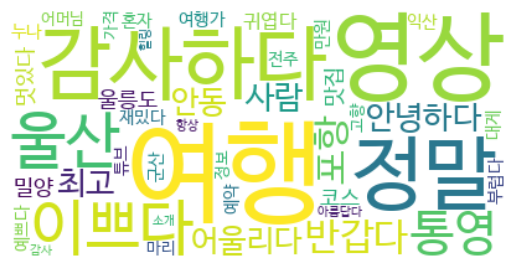

In [59]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 모든 토픽의 단어들을 단일 리스트로 합칩니다.
all_words = [word for topics_1000 in topics_1000 for word in topics_1000]

# 단어의 빈도수를 계산합니다.
word_frequencies = Counter(all_words)

# WordCloud 객체를 생성합니다.
wordCloud = WordCloud(background_color='white', font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')

# 단어 빈도수를 기반으로 WordCloud를 생성합니다.
wordCloud.generate_from_frequencies(word_frequencies)

# 생성된 WordCloud를 시각화합니다.
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

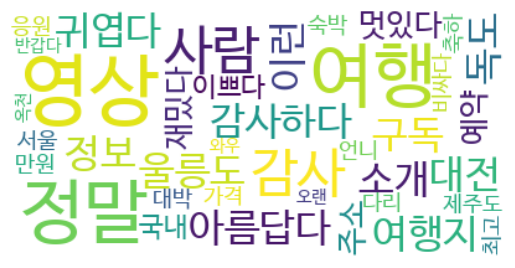

In [60]:
# 모든 토픽의 단어들을 단일 리스트로 합칩니다.
all_words = [word for topics_5000 in topics_5000 for word in topics_5000]

# 단어의 빈도수를 계산합니다.
word_frequencies = Counter(all_words)

# WordCloud 객체를 생성합니다.
wordCloud = WordCloud(background_color='white', font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')

# 단어 빈도수를 기반으로 WordCloud를 생성합니다.
wordCloud.generate_from_frequencies(word_frequencies)

# 생성된 WordCloud를 시각화합니다.
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

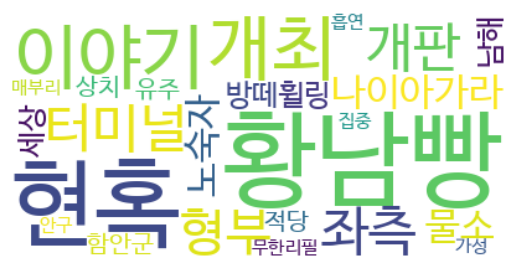

In [61]:
# 모든 토픽의 단어들을 단일 리스트로 합칩니다.
all_words = [word for topics_10000 in topics_10000 for word in topics_10000]

# 단어의 빈도수를 계산합니다.
word_frequencies = Counter(all_words)

# WordCloud 객체를 생성합니다.
wordCloud = WordCloud(background_color='white', font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')

# 단어 빈도수를 기반으로 WordCloud를 생성합니다.
wordCloud.generate_from_frequencies(word_frequencies)

# 생성된 WordCloud를 시각화합니다.
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

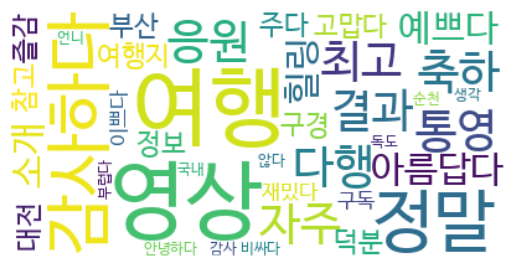

In [62]:
# 모든 토픽의 단어들을 단일 리스트로 합칩니다.
all_words = [word for topics_50000 in topics_50000 for word in topics_50000]

# 단어의 빈도수를 계산합니다.
word_frequencies = Counter(all_words)

# WordCloud 객체를 생성합니다.
wordCloud = WordCloud(background_color='white', font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')

# 단어 빈도수를 기반으로 WordCloud를 생성합니다.
wordCloud.generate_from_frequencies(word_frequencies)

# 생성된 WordCloud를 시각화합니다.
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

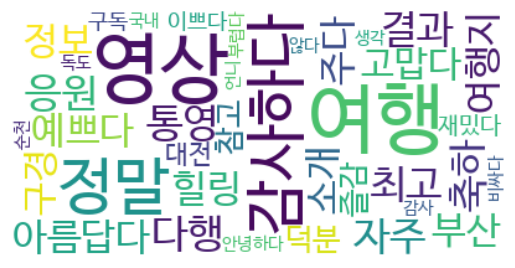

In [63]:
# 모든 토픽의 단어들을 단일 리스트로 합칩니다.
all_words = [word for topics_100000 in topics_100000 for word in topics_100000]

# 단어의 빈도수를 계산합니다.
word_frequencies = Counter(all_words)

# WordCloud 객체를 생성합니다.
wordCloud = WordCloud(background_color='white', font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')

# 단어 빈도수를 기반으로 WordCloud를 생성합니다.
wordCloud.generate_from_frequencies(word_frequencies)

# 생성된 WordCloud를 시각화합니다.
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

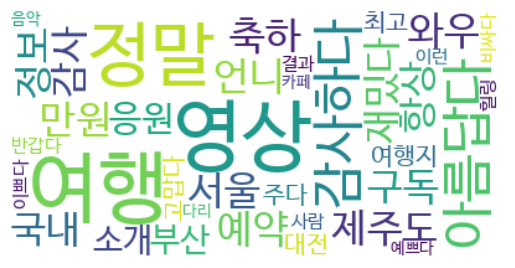

In [64]:
# 모든 토픽의 단어들을 단일 리스트로 합칩니다.
all_words = [word for topics_100001 in topics_100001 for word in topics_100001]

# 단어의 빈도수를 계산합니다.
word_frequencies = Counter(all_words)

# WordCloud 객체를 생성합니다.
wordCloud = WordCloud(background_color='white', font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')

# 단어 빈도수를 기반으로 WordCloud를 생성합니다.
wordCloud.generate_from_frequencies(word_frequencies)

# 생성된 WordCloud를 시각화합니다.
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 결과
## 추천수 0 - 1000
+ Topic 0: 이쁘다, 울산, 통영, 반갑다, 포항, 안녕하다, 최고, 여행, 사람, 어울리다
+ Topic 1: 영상, 여행, 안동, 감사하다, 울릉도, 코스, 멋있다, 정말, 맛집, 밀양
+ Topic 2: 귀엽다, 재밌다, 여행, 영상, 혼자, 부럽다, 여행가, 만원, 전주, 누나
+ Topic 3: 익산, 예약, 예쁘다, 대게, 군산, 튜브, 어머님, 가격, 고향, 마리
+ Topic 4: 감사하다, 영상, 여행, 정보, 정말, 아름답다, 힐링, 감사, 항상, 소개

## 추천수 1001 - 5000
+ Topic 0: 감사하다, 영상, 정보, 여행, 아름답다, 정말, 소개, 여행지, 구독, 감사
+ Topic 1: 영상, 귀엽다, 울릉도, 대전, 독도, 여행, 사람, 이런, 정말, 멋있다
+ Topic 2: 여행, 재밌다, 영상, 예약, 주소, 이쁘다, 국내, 제주도, 언니, 정말
+ Topic 3: 만원, 영상, 비싸다, 서울, 다리, 응원, 숙박, 여행, 대박, 가격
+ Topic 4: 최고, 축하, 반갑다, 영상, 사람, 와우, 정말, 오랜, 옥천, 감사

## 추천수 5001-10000
+ Topic 0: 개판, 황남빵, 현혹, 터미널, 좌측, 형부, 나이아가라, 개최
+ Topic 1: 황남빵, 노숙자, 물소, 방떼, 현혹, 이야기, 세상
+ Topic 2: 현혹, 황남빵, 휠링, 남해, 함안군
+ Topic 3: 상치, 황남빵, 유주, 적당, 매부리, 집중, 현혹, 무한리필, 가성
+ Topic 4: 안구, 황남빵, 이야기, 흡연, 개최

## 추천수 10001-50000
+ Topic 0: 영상, 최고, 여행, 응원, 정말, 결과, 다행, 축하, 통영, 자주
+ Topic 1: 감사하다, 영상, 아름답다, 정말, 예쁘다, 소개, 여행, 힐링, 여행지, 주다
+ Topic 2: 정보, 감사하다, 부산, 영상, 여행, 고맙다, 구경, 덕분, 즐감, 참고
+ Topic 3: 영상, 여행, 대전, 재밌다, 이쁘다, 정말, 구독, 감사하다, 안녕하다, 국내
+ Topic 4: 여행, 영상, 독도, 감사, 않다, 비싸다, 부럽다, 생각, 언니, 순천

## 추천수 500001 - 100000
+ Topic 0: 영상, 최고, 여행, 응원, 정말, 결과, 다행, 축하, 통영, 자주
+ Topic 1: 감사하다, 영상, 아름답다, 정말, 예쁘다, 소개, 여행, 힐링, 여행지, 주다
+ Topic 2: 정보, 감사하다, 부산, 영상, 여행, 고맙다, 구경, 덕분, 즐감, 참고
+ Topic 3: 영상, 여행, 대전, 재밌다, 이쁘다, 정말, 구독, 감사하다, 안녕하다, 국내
+ Topic 4: 여행, 영상, 독도, 감사, 않다, 비싸다, 부럽다, 생각, 언니, 순천

## 추천수 100001이상
+ Topic 0: 예약, 재밌다, 영상, 만원, 축하, 제주도, 서울, 언니, 여행, 와우
+ Topic 1: 감사하다, 영상, 여행, 정보, 구독, 항상, 감사, 정말, 국내, 응원
+ Topic 2: 아름답다, 감사하다, 영상, 소개, 부산, 정말, 여행지, 여행, 고맙다, 주다
+ Topic 3: 대전, 최고, 영상, 여행, 반갑다, 정말, 비싸다, 사람, 결과, 이런
+ Topic 4: 영상, 이쁘다, 힐링, 예쁘다, 음악, 여행, 다리, 정말, 카페, 아름답다

# 결론
+ 추천수에 따른 댓글 키워드 차이를 모르겠음.